In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset 
df = pd.read_csv(r"C:\Users\vuvie\PycharmProjects\boxofficerevenue\preprocessed_movieDB.csv",
				encoding='latin-1')


In [3]:
df.head()

,title,duration,user_score,number_of_vote,budget,revenue,restriction,year,month,star_power_actors,...,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science fiction,genre_thriller,genre_tv movie,genre_war,genre_western
0,Four Rooms,98,58,2560,4000000,4257354,5,1995,12,9.098045e+08,...,0,0,0,0,0,0,0,0,0,0
1,Judgment Night,109,65,321,21000000,12136938,5,1993,10,5.573047e+08,...,0,0,0,0,0,0,1,0,0,0
2,Star Wars,121,82,19970,11000000,775398007,3,1977,5,1.336120e+09,...,0,0,0,0,0,1,0,0,0,0
3,Finding Nemo,100,78,18701,94000000,940335536,0,2003,5,3.378325e+09,...,0,0,0,0,0,0,0,0,0,0
4,Forrest Gump,142,85,26574,55000000,677387716,4,1994,7,9.892606e+08,...,0,0,0,0,1,0,0,0,0,0


In [4]:
df.columns

Index(['title', 'duration', 'user_score', 'number_of_vote', 'budget',
       'revenue', 'restriction', 'year', 'month', 'star_power_actors',
       'star_power_directors', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary',
       'genre_drama', 'genre_family', 'genre_fantasy', 'genre_history',
       'genre_horror', 'genre_music', 'genre_mystery', 'genre_romance',
       'genre_science fiction', 'genre_thriller', 'genre_tv movie',
       'genre_war', 'genre_western'],
      dtype='object')

In [5]:
df.drop(columns=['title'], inplace=True)
# remove columns that are not important for predicting

In [6]:
df.head()

,duration,user_score,number_of_vote,budget,revenue,restriction,year,month,star_power_actors,star_power_directors,...,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science fiction,genre_thriller,genre_tv movie,genre_war,genre_western
0,98,58,2560,4000000,4257354,5,1995,12,9.098045e+08,5.001889e+08,...,0,0,0,0,0,0,0,0,0,0
1,109,65,321,21000000,12136938,5,1993,10,5.573047e+08,3.604714e+08,...,0,0,0,0,0,0,1,0,0,0
2,121,82,19970,11000000,775398007,3,1977,5,1.336120e+09,3.341551e+09,...,0,0,0,0,0,1,0,0,0,0
3,100,78,18701,94000000,940335536,0,2003,5,3.378325e+09,1.745747e+09,...,0,0,0,0,0,0,0,0,0,0
4,142,85,26574,55000000,677387716,4,1994,7,9.892606e+08,3.613586e+09,...,0,0,0,0,1,0,0,0,0,0


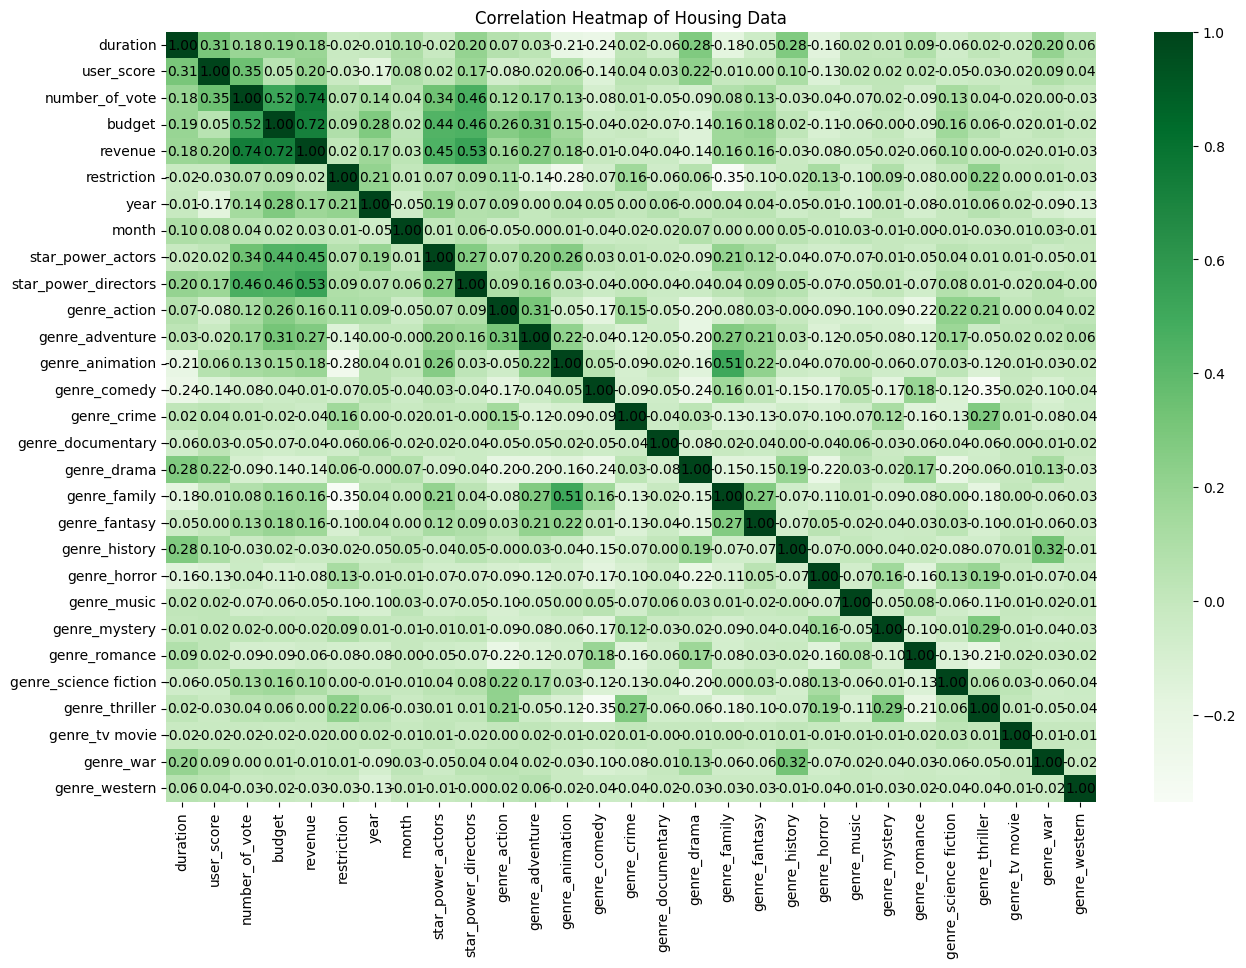

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=False, cmap='Greens')
#Create a correlation matrix
correlation_matrix = df.corr()
# Loop through each cell in the correlation matrix and annotate it
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j+0.5, i+0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black')

plt.title('Correlation Heatmap of Housing Data')
plt.show()

In [8]:
df.columns

Index(['duration', 'user_score', 'number_of_vote', 'budget', 'revenue',
       'restriction', 'year', 'month', 'star_power_actors',
       'star_power_directors', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary',
       'genre_drama', 'genre_family', 'genre_fantasy', 'genre_history',
       'genre_horror', 'genre_music', 'genre_mystery', 'genre_romance',
       'genre_science fiction', 'genre_thriller', 'genre_tv movie',
       'genre_war', 'genre_western'],
      dtype='object')

In [9]:
# Define your features (independent variables) and target (dependent variable)
pre_released_features = ['duration', 'user_score', 'number_of_vote', 'budget',
       'restriction', 'year', 'month', 'star_power_actors', 'star_power_directors',
       'genre_action', 'genre_adventure', 'genre_animation', 'genre_comedy',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fantasy', 'genre_history', 'genre_horror', 'genre_music',
       'genre_mystery', 'genre_romance', 'genre_science fiction',
       'genre_thriller', 'genre_tv movie', 'genre_war', 'genre_western']
target = [ 'revenue']

X = df[pre_released_features]
y = df[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)  

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 4987 samples
Test set size: 1247 samples


In [10]:
X_train

,duration,user_score,number_of_vote,budget,restriction,year,month,star_power_actors,star_power_directors,genre_action,...,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science fiction,genre_thriller,genre_tv movie,genre_war,genre_western
1456,127,71,625,18000000,5,2009,3,1.325936e+08,2.318926e+08,0,...,0,0,0,0,1,0,1,0,0,0
1934,89,53,785,17900000,4,1985,7,8.102274e+08,1.573369e+08,1,...,0,0,0,0,0,0,0,0,0,0
3272,125,74,334,16000000,5,1992,3,2.234213e+08,1.310000e+07,0,...,0,0,0,0,0,0,0,0,0,0
537,200,75,1090,11000000,4,1965,12,3.395995e+08,2.867632e+08,0,...,0,0,0,0,1,0,0,0,1,0
4475,107,57,357,18000000,3,2009,9,2.130121e+08,7.721184e+07,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3468,89,48,434,6000000,3,2007,8,2.826204e+08,1.819740e+07,0,...,0,0,0,0,0,0,0,0,0,0
3409,104,66,124,3000000,5,1996,12,2.833710e+08,2.904279e+08,0,...,0,0,0,0,0,0,0,0,0,0
2789,151,65,1097,30000000,4,2005,12,6.819286e+08,1.870266e+08,0,...,1,0,0,0,1,0,0,0,0,0
311,121,73,18390,139000000,4,2002,5,1.875701e+09,2.828832e+09,1,...,0,0,0,0,0,1,0,0,0,0


In [11]:
y_train

,revenue
1456,30991660
1934,6948633
3272,13100000
537,111858363
4475,77211836
...,...
3468,18197398
3409,285112
2789,30500000
311,821708551


In [12]:
X_test

,duration,user_score,number_of_vote,budget,restriction,year,month,star_power_actors,star_power_directors,genre_action,...,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science fiction,genre_thriller,genre_tv movie,genre_war,genre_western
1784,123,72,330,9000000,5,1996,11,6.693750e+08,3.347597e+08,0,...,0,0,0,0,0,0,1,0,0,0
4038,91,40,187,10000000,4,2009,6,1.221421e+08,3.670760e+07,0,...,0,0,0,0,0,0,0,0,0,0
637,119,73,4179,7000000,3,1979,6,5.054762e+08,1.264200e+09,0,...,0,0,0,0,0,0,0,0,0,0
3509,77,68,2063,7000,4,2004,10,1.355909e+06,5.454360e+05,0,...,0,0,0,0,0,1,1,0,0,0
2741,93,59,271,1500000,5,1990,9,3.298695e+08,5.728953e+06,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,142,85,26574,55000000,4,1994,7,9.892606e+08,3.613586e+09,0,...,0,0,0,0,1,0,0,0,0,0
2489,136,60,521,18000000,3,1982,6,5.479787e+08,2.814772e+09,1,...,0,0,0,0,0,1,1,0,0,0
654,140,74,168,665603,2,1924,12,9.709201e+06,6.750270e+05,0,...,0,0,0,0,0,0,0,0,0,0
103,103,74,8895,1200000,5,2004,10,1.102029e+09,2.430000e+08,0,...,0,1,0,1,0,0,0,0,0,0


In [13]:
y_test

,revenue
1784,41590886
4038,7600
637,85200000
3509,545436
2741,5728953
...,...
4,677387716
2489,70700000
654,274827
103,103911669


In [14]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Initialize the MinMaxScaler
scaler1 = StandardScaler()

scaledX_train = scaler1.fit_transform(X_train)

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Initialize the MinMaxScaler
scaler2 = StandardScaler()

scaledy_train = scaler2.fit_transform(y_train)

In [16]:
scaledX_train

array([[ 0.87742579,  0.72318569, -0.32498375, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [-0.86663962, -1.01569108, -0.26916306, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [ 0.78563287,  1.01299848, -0.42650762, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       ...,
       [ 1.97894078,  0.1435601 , -0.16031273, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [ 0.60204704,  0.91639422,  5.87285677, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [ 1.33639037,  0.04695583, -0.416739  , ..., -0.03470702,
        -0.2022623 , -0.14009956]])

In [17]:
scaledy_train

array([[-0.25908159],
       [-0.45103732],
       [-0.40192578],
       ...,
       [-0.26300693],
       [ 6.05387701],
       [ 0.29577538]])

In [18]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV , KFold

# Define the SVR model
svr = SVR() 

# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'],
              'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
              }

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV
grid = GridSearchCV(SVR(), param_grid, cv=kf, refit=True, verbose= 0)   

# Fit the model on the training data
grid.fit(scaledX_train, scaledy_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [19]:
# Get the best parameters
best_params = grid.best_params_
print("Best parameters:", best_params)

Best parameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}


In [20]:
from sklearn.svm import SVR 
from math import sqrt

# Create a new SVR model with the best parameters
best_svr = SVR(**best_params)

# Fit the model on the training data
best_svr.fit(scaledX_train, scaledy_train)

SVR(C=10, gamma=0.01)

In [21]:
X_test

,duration,user_score,number_of_vote,budget,restriction,year,month,star_power_actors,star_power_directors,genre_action,...,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science fiction,genre_thriller,genre_tv movie,genre_war,genre_western
1784,123,72,330,9000000,5,1996,11,6.693750e+08,3.347597e+08,0,...,0,0,0,0,0,0,1,0,0,0
4038,91,40,187,10000000,4,2009,6,1.221421e+08,3.670760e+07,0,...,0,0,0,0,0,0,0,0,0,0
637,119,73,4179,7000000,3,1979,6,5.054762e+08,1.264200e+09,0,...,0,0,0,0,0,0,0,0,0,0
3509,77,68,2063,7000,4,2004,10,1.355909e+06,5.454360e+05,0,...,0,0,0,0,0,1,1,0,0,0
2741,93,59,271,1500000,5,1990,9,3.298695e+08,5.728953e+06,0,...,0,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,142,85,26574,55000000,4,1994,7,9.892606e+08,3.613586e+09,0,...,0,0,0,0,1,0,0,0,0,0
2489,136,60,521,18000000,3,1982,6,5.479787e+08,2.814772e+09,1,...,0,0,0,0,0,1,1,0,0,0
654,140,74,168,665603,2,1924,12,9.709201e+06,6.750270e+05,0,...,0,0,0,0,0,0,0,0,0,0
103,103,74,8895,1200000,5,2004,10,1.102029e+09,2.430000e+08,0,...,0,1,0,1,0,0,0,0,0,0


In [22]:
# Transform the test data
X_test_scaled = scaler1.transform(X_test)

In [23]:
X_test_scaled

array([[ 0.69383996,  0.81978995, -0.42790314, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [-0.7748467 , -2.27154653, -0.47779288, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [ 0.51025413,  0.91639422,  0.91493324, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       ...,
       [ 1.47407975,  1.01299848, -0.48442158, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [-0.2240892 ,  1.01299848,  2.56024795, ..., -0.03470702,
        -0.2022623 , -0.14009956],
       [-0.26998566, -0.33946123, -0.53919563, ..., -0.03470702,
        -0.2022623 , -0.14009956]])

In [24]:
# Now you can make predictions using the fitted model
y_pred_scaled = best_svr.predict(X_test_scaled)

In [25]:
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

In [26]:
# Inverse transform the scaled predictions to original scale
y_pred = scaler2.inverse_transform(y_pred_scaled)

In [27]:
y_pred = np.maximum(y_pred, 0)

In [28]:
y_test

,revenue
1784,41590886
4038,7600
637,85200000
3509,545436
2741,5728953
...,...
4,677387716
2489,70700000
654,274827
103,103911669


In [29]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(f'RMSE on Test Set: {rmse}')
print(f'R^2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Mean Squared Error: 3091242386407969.0
RMSE on Test Set: 55598942.31375242
R^2 Score: 0.814873630110677
Mean Absolute Error: 27387459.61192216


In [30]:
y_test.reset_index(drop=True, inplace=True)

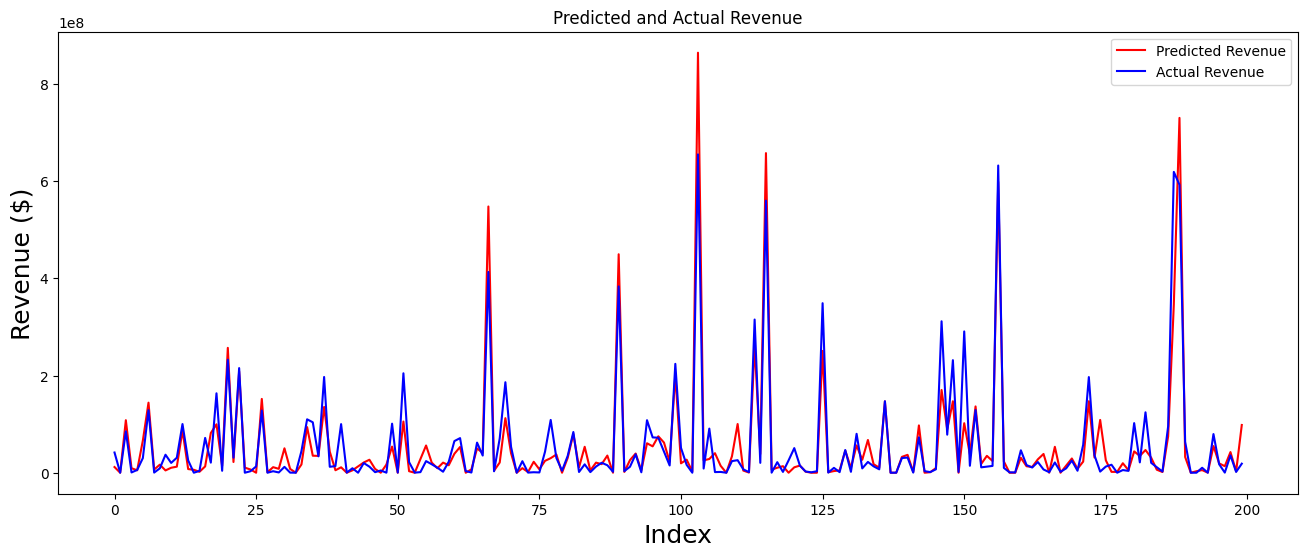

In [31]:
plt.figure(figsize=(16,6))
plt.title('Predicted and Actual Revenue')
plt.plot(y_pred[:200], color='red', label='Predicted Revenue')
plt.plot(y_test[:200], color='blue', label='Actual Revenue')
plt.legend()
plt.xlabel('Index', fontsize=18)
plt.ylabel('Revenue ($)', fontsize=18)
plt.show()

In [32]:
df.head()

,duration,user_score,number_of_vote,budget,revenue,restriction,year,month,star_power_actors,star_power_directors,...,genre_history,genre_horror,genre_music,genre_mystery,genre_romance,genre_science fiction,genre_thriller,genre_tv movie,genre_war,genre_western
0,98,58,2560,4000000,4257354,5,1995,12,9.098045e+08,5.001889e+08,...,0,0,0,0,0,0,0,0,0,0
1,109,65,321,21000000,12136938,5,1993,10,5.573047e+08,3.604714e+08,...,0,0,0,0,0,0,1,0,0,0
2,121,82,19970,11000000,775398007,3,1977,5,1.336120e+09,3.341551e+09,...,0,0,0,0,0,1,0,0,0,0
3,100,78,18701,94000000,940335536,0,2003,5,3.378325e+09,1.745747e+09,...,0,0,0,0,0,0,0,0,0,0
4,142,85,26574,55000000,677387716,4,1994,7,9.892606e+08,3.613586e+09,...,0,0,0,0,1,0,0,0,0,0


In [33]:
df.columns

Index(['duration', 'user_score', 'number_of_vote', 'budget', 'revenue',
       'restriction', 'year', 'month', 'star_power_actors',
       'star_power_directors', 'genre_action', 'genre_adventure',
       'genre_animation', 'genre_comedy', 'genre_crime', 'genre_documentary',
       'genre_drama', 'genre_family', 'genre_fantasy', 'genre_history',
       'genre_horror', 'genre_music', 'genre_mystery', 'genre_romance',
       'genre_science fiction', 'genre_thriller', 'genre_tv movie',
       'genre_war', 'genre_western'],
      dtype='object')

In [34]:
new_input = np.array([[98, 58, 2560, 4000000, 5, 1995, 12,980450000,500188900,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
new_input_scaled = scaler1.transform(new_input)

new_input_scaled

# use new input to predict new data

array([[-0.45357149, -0.53266976,  0.35009767, -0.59757562,  0.91132131,
        -0.03503785,  1.46746933,  0.63659328,  0.07683162,  1.83179107,
        -0.44651394, -0.22038654, -0.78319456, -0.44295612, -0.10847623,
        -0.92593503, -0.32934564, -0.32219093, -0.2292462 , -0.35171632,
        -0.20914624, -0.3052227 , -0.51487266, -0.34520309, -0.56507714,
        -0.03470702, -0.2022623 , -0.14009956]])

In [35]:
predicted_output = best_svr.predict(new_input_scaled)

In [36]:
predicted_output = predicted_output.reshape(-1, 1)

In [37]:
predicted_output = scaler2.inverse_transform(predicted_output)

In [38]:
predicted_output

array([[93886360.3217014]])

In [39]:
import joblib
joblib.dump(best_svr, 'best_svr.pkl')
joblib.dump(scaler1, 'scaler1.pkl')
joblib.dump(scaler2, 'scaler2.pkl')

['scaler2.pkl']